In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
df = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
print(df["Seller_Type"].unique())
print(df["Transmission"].unique())
print(df["Owner"].unique())
print(df["Fuel_Type"].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [5]:
##missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df["no_year"] = 2020-df["Year"]
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [8]:
final_df = df[df.columns.difference(['Car_Name'])]
final_df

,Fuel_Type,Kms_Driven,Owner,Present_Price,Seller_Type,Selling_Price,Transmission,Year,no_year
0,Petrol,27000,0,5.59,Dealer,3.35,Manual,2014,6
1,Diesel,43000,0,9.54,Dealer,4.75,Manual,2013,7
2,Petrol,6900,0,9.85,Dealer,7.25,Manual,2017,3
3,Petrol,5200,0,4.15,Dealer,2.85,Manual,2011,9
4,Diesel,42450,0,6.87,Dealer,4.60,Manual,2014,6
...,...,...,...,...,...,...,...,...,...
296,Diesel,33988,0,11.60,Dealer,9.50,Manual,2016,4
297,Petrol,60000,0,5.90,Dealer,4.00,Manual,2015,5
298,Petrol,87934,0,11.00,Dealer,3.35,Manual,2009,11
299,Diesel,9000,0,12.50,Dealer,11.50,Manual,2017,3


In [9]:
final_df['Current_yr']=2020
final_df

,Fuel_Type,Kms_Driven,Owner,Present_Price,Seller_Type,Selling_Price,Transmission,Year,no_year,Current_yr
0,Petrol,27000,0,5.59,Dealer,3.35,Manual,2014,6,2020
1,Diesel,43000,0,9.54,Dealer,4.75,Manual,2013,7,2020
2,Petrol,6900,0,9.85,Dealer,7.25,Manual,2017,3,2020
3,Petrol,5200,0,4.15,Dealer,2.85,Manual,2011,9,2020
4,Diesel,42450,0,6.87,Dealer,4.60,Manual,2014,6,2020
...,...,...,...,...,...,...,...,...,...,...
296,Diesel,33988,0,11.60,Dealer,9.50,Manual,2016,4,2020
297,Petrol,60000,0,5.90,Dealer,4.00,Manual,2015,5,2020
298,Petrol,87934,0,11.00,Dealer,3.35,Manual,2009,11,2020
299,Diesel,9000,0,12.50,Dealer,11.50,Manual,2017,3,2020


In [10]:
final_df['no_year'] = final_df['Year']
final_df

,Fuel_Type,Kms_Driven,Owner,Present_Price,Seller_Type,Selling_Price,Transmission,Year,no_year,Current_yr
0,Petrol,27000,0,5.59,Dealer,3.35,Manual,2014,2014,2020
1,Diesel,43000,0,9.54,Dealer,4.75,Manual,2013,2013,2020
2,Petrol,6900,0,9.85,Dealer,7.25,Manual,2017,2017,2020
3,Petrol,5200,0,4.15,Dealer,2.85,Manual,2011,2011,2020
4,Diesel,42450,0,6.87,Dealer,4.60,Manual,2014,2014,2020
...,...,...,...,...,...,...,...,...,...,...
296,Diesel,33988,0,11.60,Dealer,9.50,Manual,2016,2016,2020
297,Petrol,60000,0,5.90,Dealer,4.00,Manual,2015,2015,2020
298,Petrol,87934,0,11.00,Dealer,3.35,Manual,2009,2009,2020
299,Diesel,9000,0,12.50,Dealer,11.50,Manual,2017,2017,2020


In [11]:
final_df.drop(["Current_yr","Year"],axis =1, inplace = True)
final_df

,Fuel_Type,Kms_Driven,Owner,Present_Price,Seller_Type,Selling_Price,Transmission,no_year
0,Petrol,27000,0,5.59,Dealer,3.35,Manual,2014
1,Diesel,43000,0,9.54,Dealer,4.75,Manual,2013
2,Petrol,6900,0,9.85,Dealer,7.25,Manual,2017
3,Petrol,5200,0,4.15,Dealer,2.85,Manual,2011
4,Diesel,42450,0,6.87,Dealer,4.60,Manual,2014
...,...,...,...,...,...,...,...,...
296,Diesel,33988,0,11.60,Dealer,9.50,Manual,2016
297,Petrol,60000,0,5.90,Dealer,4.00,Manual,2015
298,Petrol,87934,0,11.00,Dealer,3.35,Manual,2009
299,Diesel,9000,0,12.50,Dealer,11.50,Manual,2017


In [12]:
final_df = pd.get_dummies(final_df,drop_first= True)
final_df

,Kms_Driven,Owner,Present_Price,Selling_Price,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,27000,0,5.59,3.35,2014,0,1,0,1
1,43000,0,9.54,4.75,2013,1,0,0,1
2,6900,0,9.85,7.25,2017,0,1,0,1
3,5200,0,4.15,2.85,2011,0,1,0,1
4,42450,0,6.87,4.60,2014,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,33988,0,11.60,9.50,2016,1,0,0,1
297,60000,0,5.90,4.00,2015,0,1,0,1
298,87934,0,11.00,3.35,2009,0,1,0,1
299,9000,0,12.50,11.50,2017,1,0,0,1


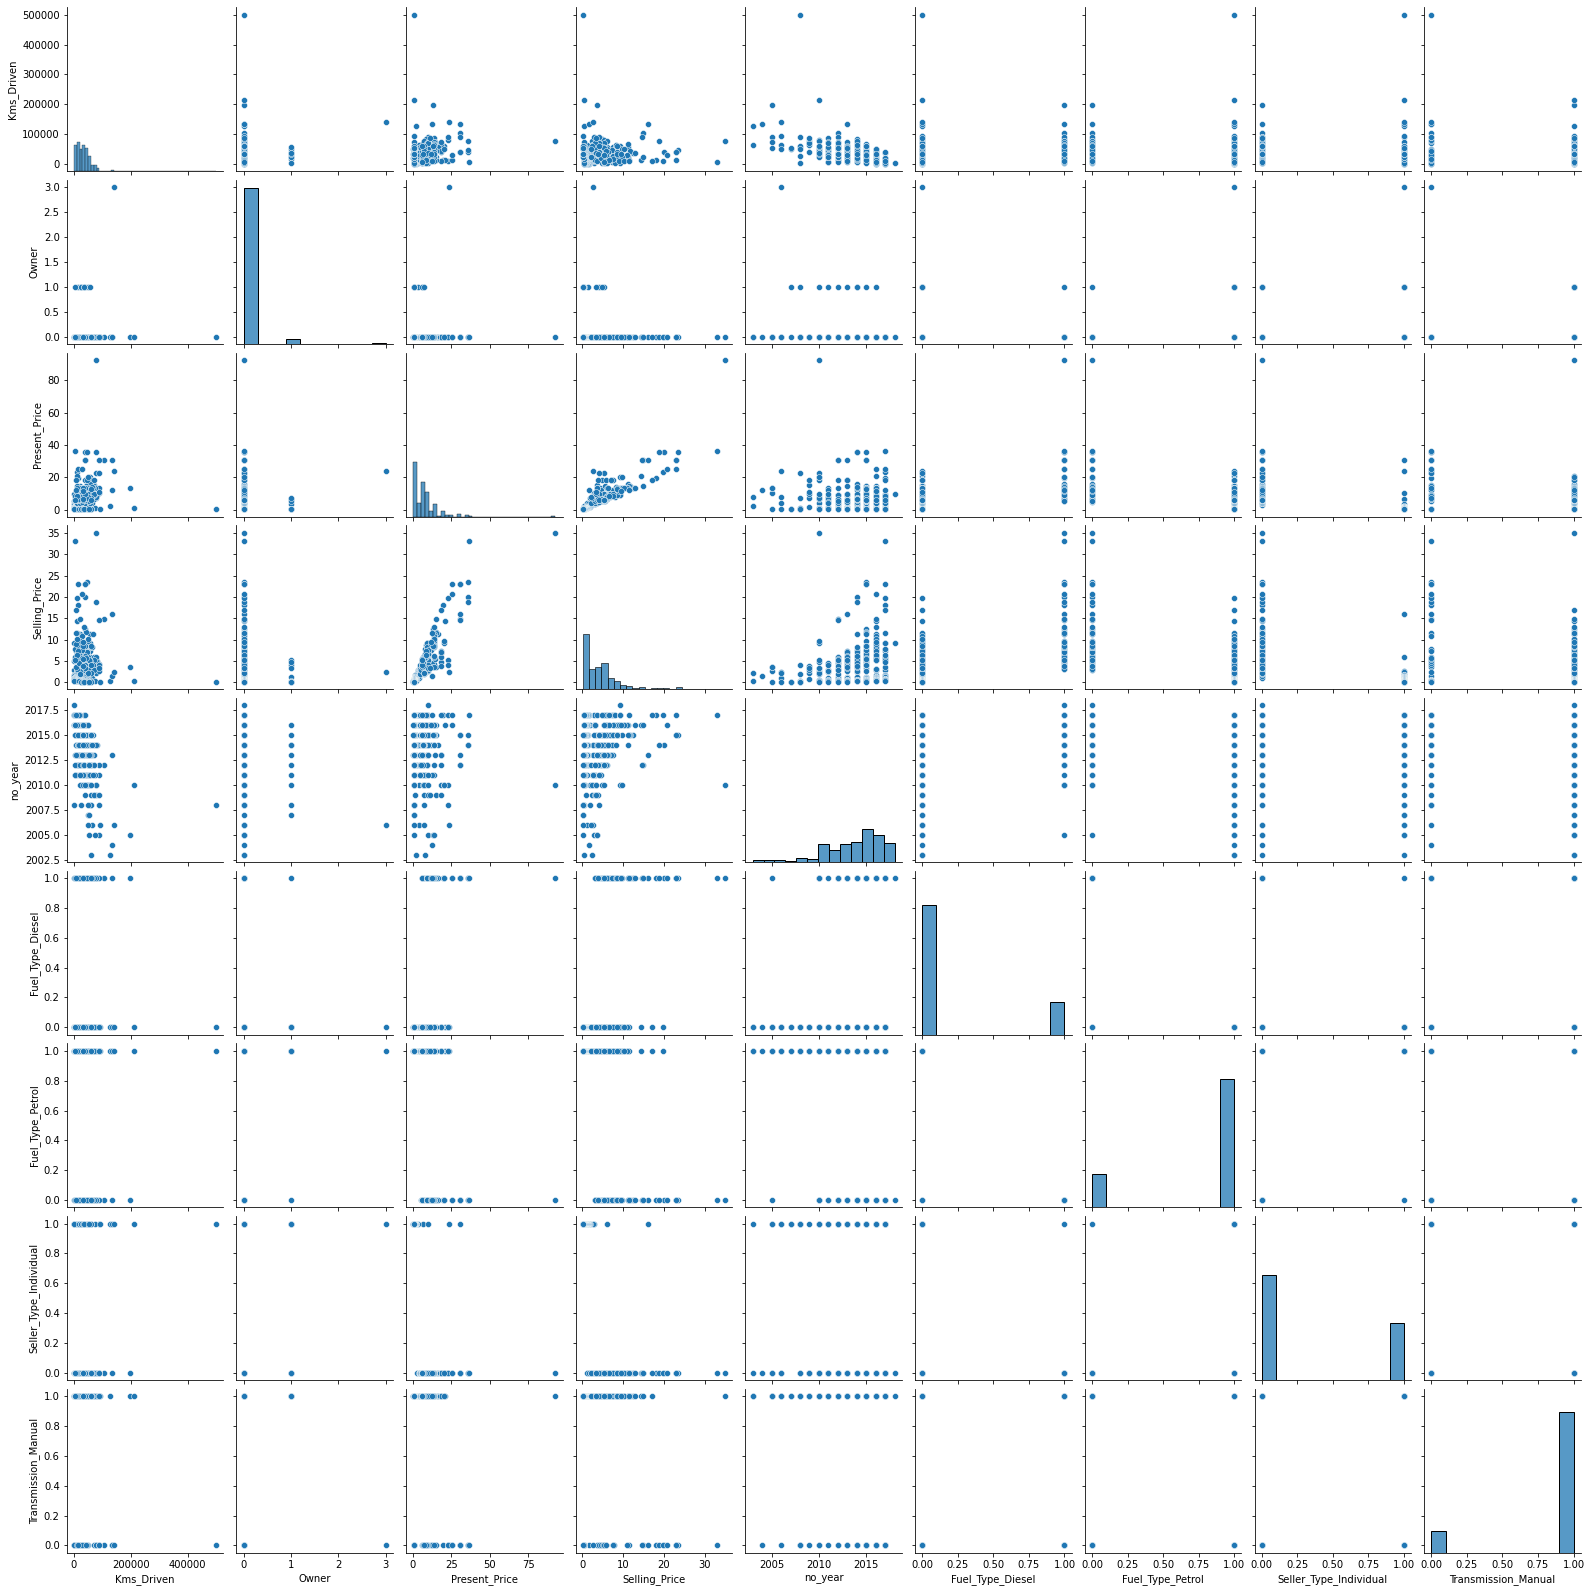

In [13]:
import seaborn as sns
sns.pairplot(final_df)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

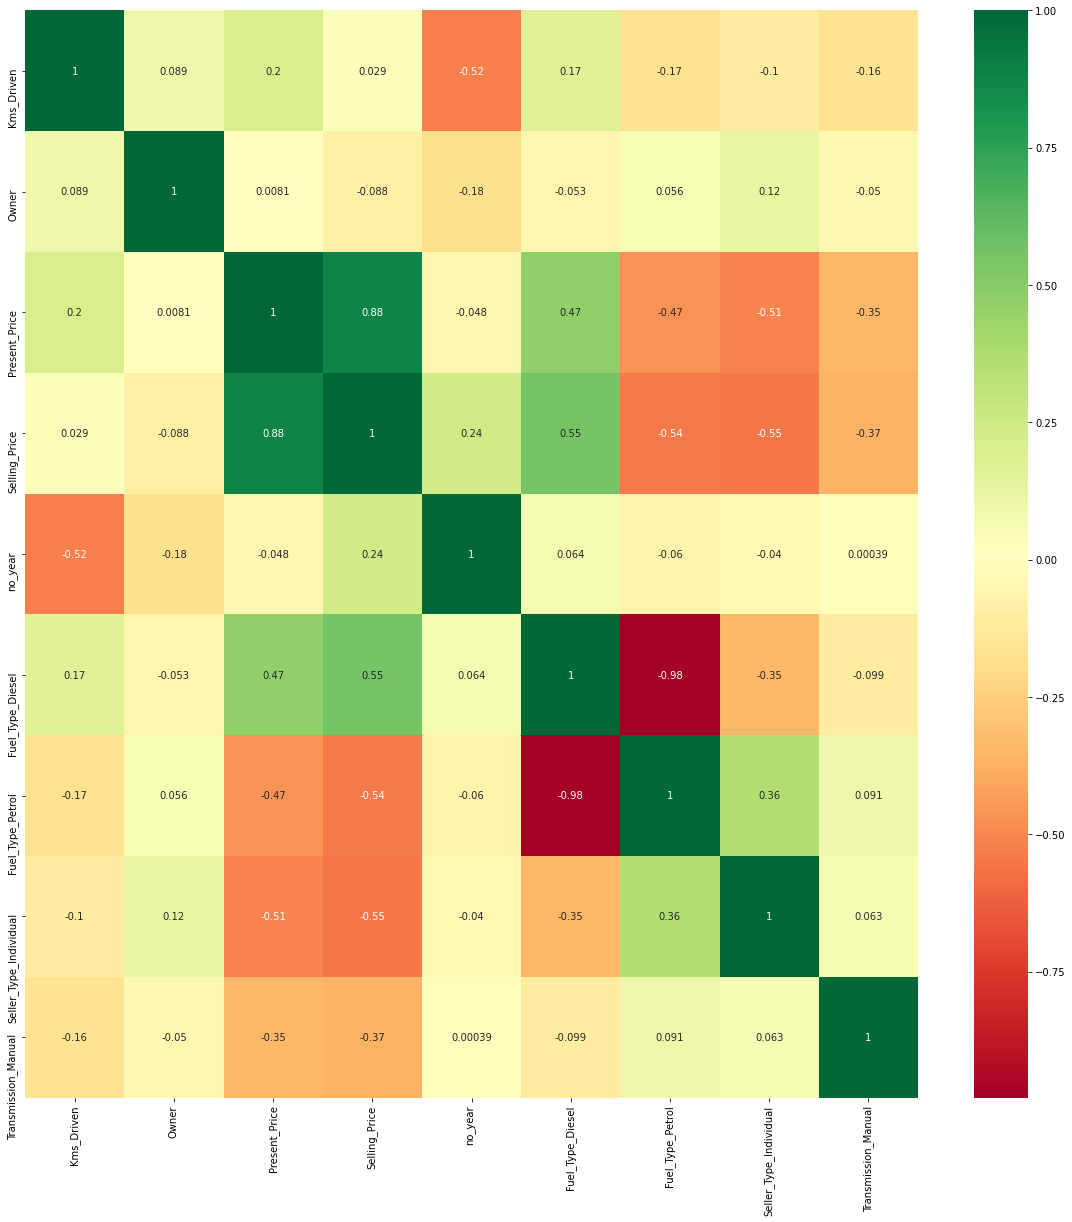

In [15]:
corr_mat = final_df.corr()
top_corr_features = corr_mat.index
plt.figure(figsize = (20,20))
g = sns.heatmap(final_df[top_corr_features].corr(),annot = True,cmap = "RdYlGn")

In [16]:
X = final_df[final_df.columns.difference(['Selling_Price'])]
y = final_df["Selling_Price"]

In [17]:
X.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol,Kms_Driven,Owner,Present_Price,Seller_Type_Individual,Transmission_Manual,no_year
0,0,1,27000,0,5.59,0,1,2014
1,1,0,43000,0,9.54,0,1,2013
2,0,1,6900,0,9.85,0,1,2017
3,0,1,5200,0,4.15,0,1,2011
4,1,0,42450,0,6.87,0,1,2014


In [18]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(*list(zip(X.columns,model.feature_importances_)),sep="\n")

('Fuel_Type_Diesel', 0.22603664377372834)
('Fuel_Type_Petrol', 0.014680450619225946)
('Kms_Driven', 0.04148730831061191)
('Owner', 0.00031301094857088987)
('Present_Price', 0.3690805652909356)
('Seller_Type_Individual', 0.12624620032629078)
('Transmission_Manual', 0.1490171991240464)
('no_year', 0.07313862160659014)


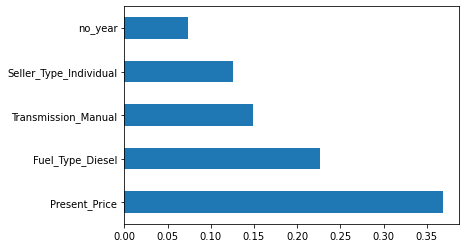

In [20]:
top_features = pd.Series(model.feature_importances_,index = X.columns)
top_5_features = top_features.nlargest(5).plot(kind = "barh")

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [22]:
from sklearn.model_selection import RandomizedSearchCV


In [23]:
## n_estimators is the  no of trees in the fores
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num =12, dtype = np.int32)]
## max_features denotes the no of features to look for the best split
max_features = ['auto', 'sqrt']
## max_depth is the maximum no of levels a tree can grow
max_depth = [int(x) for x in np.linspace(5, 30,num=6)]
## min_samples_split denotes the minimum no of features required to split an internal node
min_samples_split = [2, 5 ,10, 15, 100]
## min_samples_split denotes the minimum no of features required to become a leaf node
min_samples_leaf = [1, 2, 5, 10]

In [24]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ["auto" , "sqrt"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [25]:
random_grid = {
    "n_estimators" : n_estimators,
    "max_depth" : max_depth,
    "min_samples_split" : min_samples_split,
    "min_samples_leaf" : min_samples_leaf
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [30]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
rf_randomized = RandomizedSearchCV( 
        estimator = RF_model, 
        param_distributions = random_grid, 
        n_iter = 10, 
        cv = 5, 
        scoring = "neg_mean_squared_error", 
        verbose = 2, 
        random_state = 42)

In [31]:
rf_randomized.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.4s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.6s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.3s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.3s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.3s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=2

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [32]:
predictions = rf_randomized.predict(X_test)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

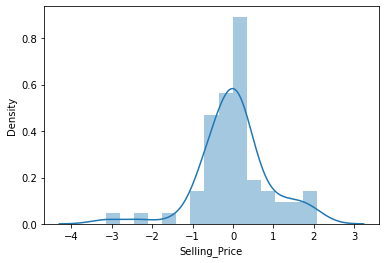

In [33]:
sns.distplot(y_test-predictions)

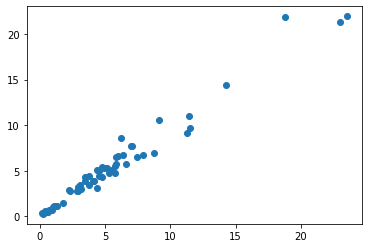

In [34]:
plt.scatter(y_test,predictions)

In [35]:
import pickle
file = open("car_price_prediction.pkl",'wb')
pickle.dump(rf_randomized, file)